In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
TD = pd.read_excel('Tableau_Declarations-Prealables-Embauche.xlsx',header=0)
TD.head()

,Annee,Trimestre,Dernier_jour_du_mois,Duree_de_contrat,Nature_de_contrat,DPAE_brut,DPAE_cvs
0,2000,1,2000-01-31,Contrat de plus d'un mois,CDD de plus d'un mois,276907,324827
1,2000,1,2000-01-31,Contrat de plus d'un mois,CDI,279422,227295
2,2000,1,2000-02-29,Contrat de plus d'un mois,CDI,221387,230751
3,2000,1,2000-02-29,Contrat de plus d'un mois,CDD de plus d'un mois,222280,322663
4,2000,1,2000-03-31,Contrat de plus d'un mois,CDD de plus d'un mois,267550,324818


In [3]:
TD.index

RangeIndex(start=0, stop=530, step=1)

In [4]:
mask_CDD = TD['Nature_de_contrat'].str.match("CDD.*")
CDD=TD[mask_CDD]
 
rng = pd.date_range('2000 Jan 1', periods=len(CDD), freq='MS')
CDD.index = rng
CDD


,Annee,Trimestre,Dernier_jour_du_mois,Duree_de_contrat,Nature_de_contrat,DPAE_brut,DPAE_cvs
2000-01-01,2000,1,2000-01-31,Contrat de plus d'un mois,CDD de plus d'un mois,276907,324827
2000-02-01,2000,1,2000-02-29,Contrat de plus d'un mois,CDD de plus d'un mois,222280,322663
2000-03-01,2000,1,2000-03-31,Contrat de plus d'un mois,CDD de plus d'un mois,267550,324818
2000-04-01,2000,2,2000-04-30,Contrat de plus d'un mois,CDD de plus d'un mois,276084,323029
2000-05-01,2000,2,2000-05-31,Contrat de plus d'un mois,CDD de plus d'un mois,296619,339371
...,...,...,...,...,...,...,...
2021-09-01,2021,3,2021-09-30,Contrat de plus d'un mois,CDD de plus d'un mois,802787,426257
2021-10-01,2021,4,2021-10-31,Contrat de plus d'un mois,CDD de plus d'un mois,390167,407504
2021-11-01,2021,4,2021-11-30,Contrat de plus d'un mois,CDD de plus d'un mois,352382,399448
2021-12-01,2021,4,2021-12-31,Contrat de plus d'un mois,CDD de plus d'un mois,252993,395038


In [5]:
mask_CDI = TD['Nature_de_contrat'].str.match("CDI.*")
CDI=TD[mask_CDI]
rng = pd.date_range('2000 Jan 1', periods=len(CDI), freq='MS')
CDI.index = rng
CDI.describe()

,Annee,Trimestre,DPAE_brut,DPAE_cvs
count,265.000000,265.000000,265.000000,265.000000
mean,2010.543396,2.494340,279470.543396,278971.501887
std,6.383499,1.121825,73946.442828,41649.799392
min,2000.000000,1.000000,102113.000000,106721.000000
25%,2005.000000,1.000000,230809.000000,250402.000000
50%,2011.000000,2.000000,261842.000000,270705.000000
75%,2016.000000,3.000000,315708.000000,293333.000000
max,2022.000000,4.000000,615103.000000,409838.000000


<AxesSubplot:title={'center':'DPAE_brut'}, xlabel='Trimestre'>

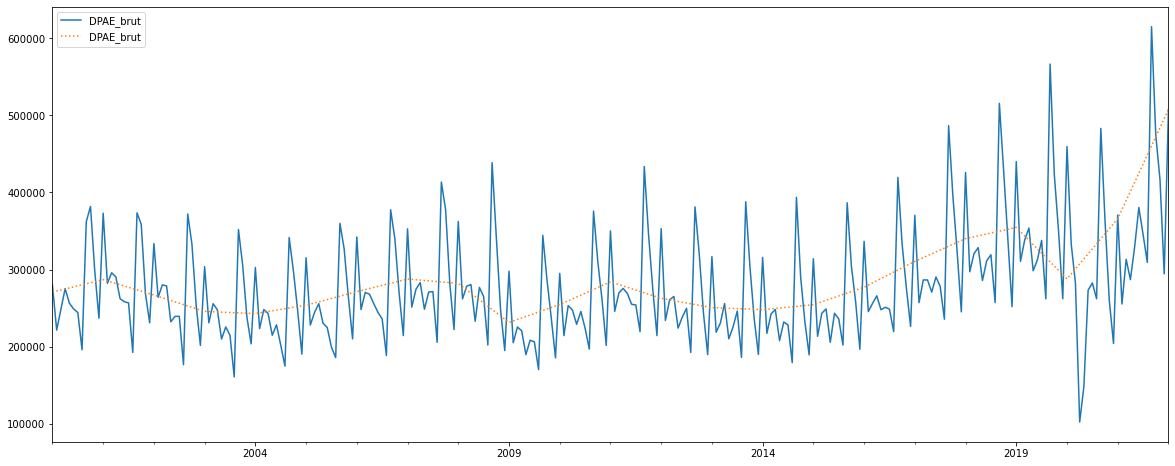

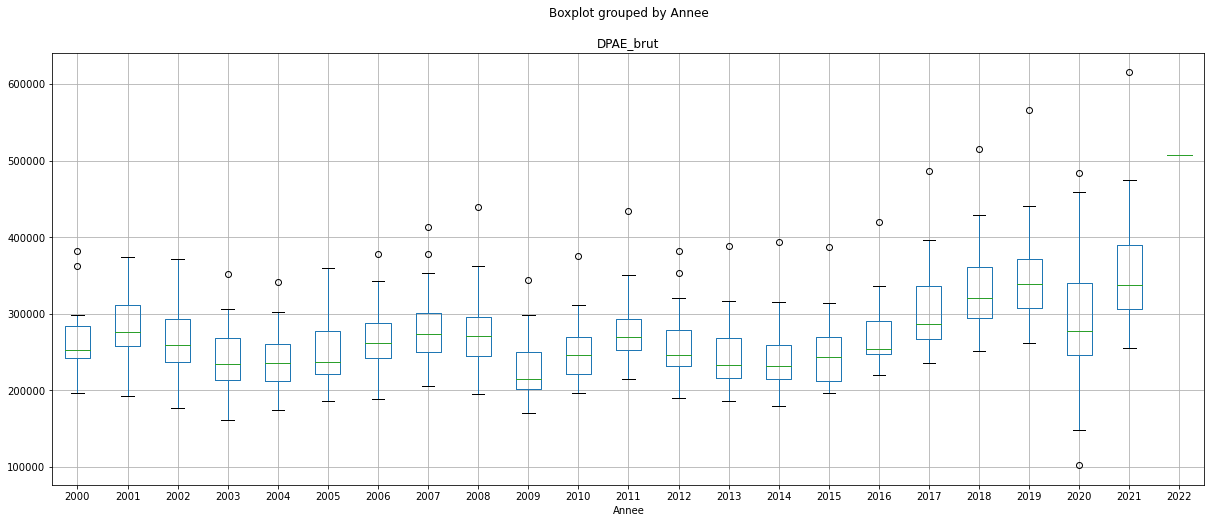

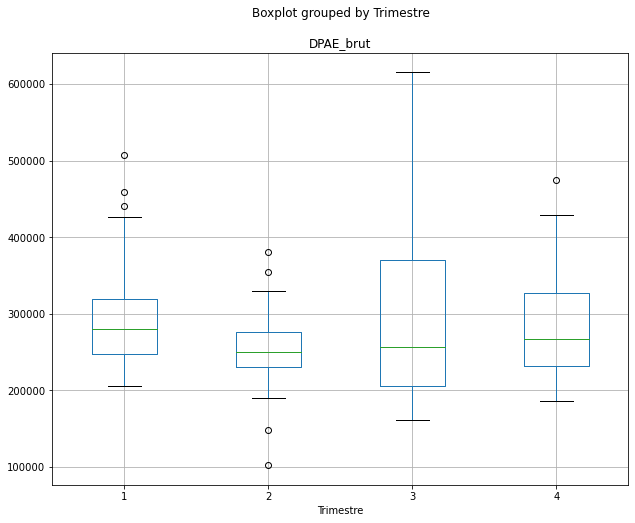

In [6]:
ax= CDI.plot(y=["DPAE_brut"],style='-')
CDI.resample('BA').mean().plot(y=["DPAE_brut"],style=':',ax=ax,figsize=(20,8))

CDI.boxplot(column=["DPAE_brut"], by='Annee', figsize=(20,8))
CDI.boxplot(column=["DPAE_brut"], by='Trimestre', figsize=(10,8))


<AxesSubplot:title={'center':'DPAE_brut'}, xlabel='Trimestre'>

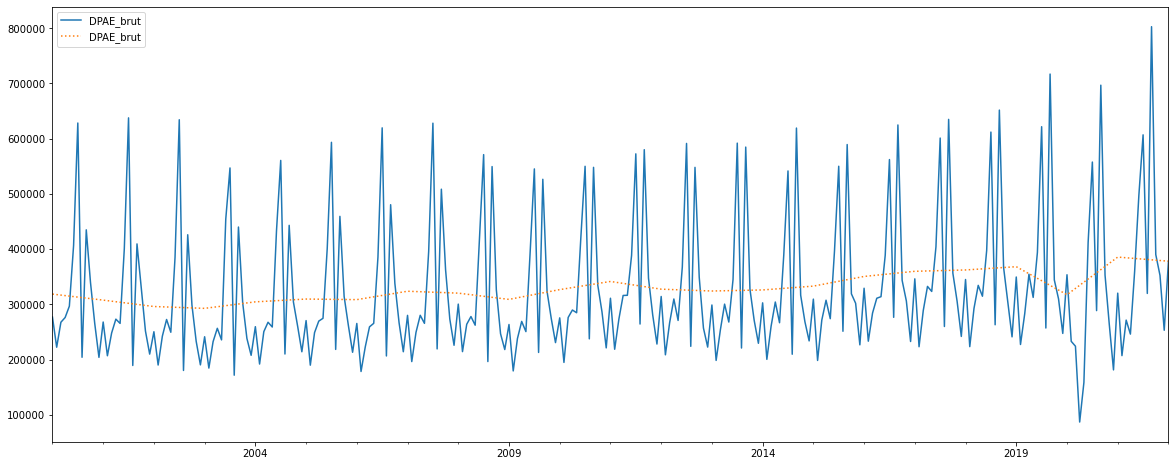

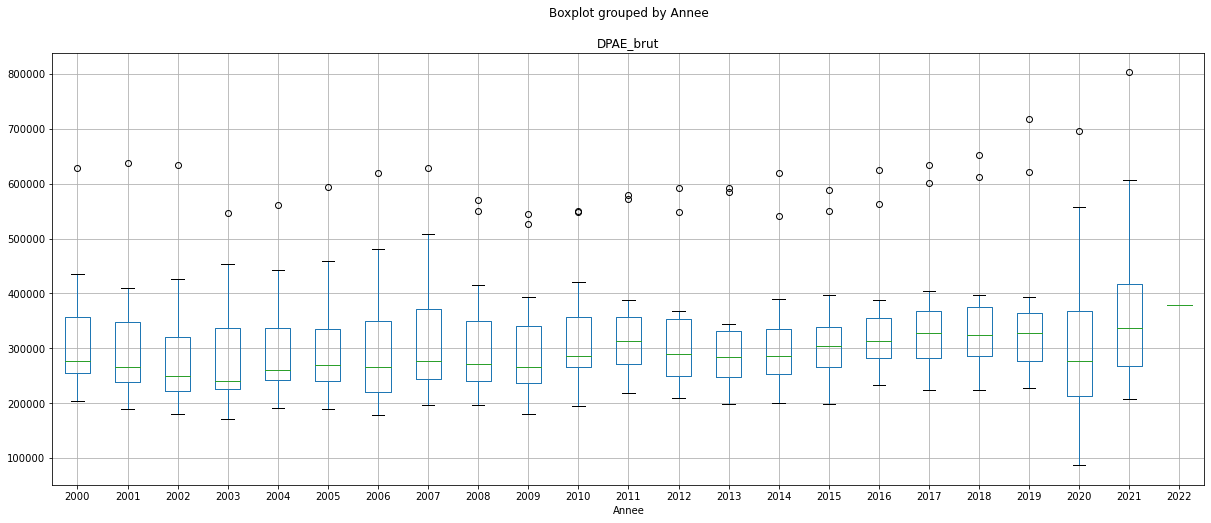

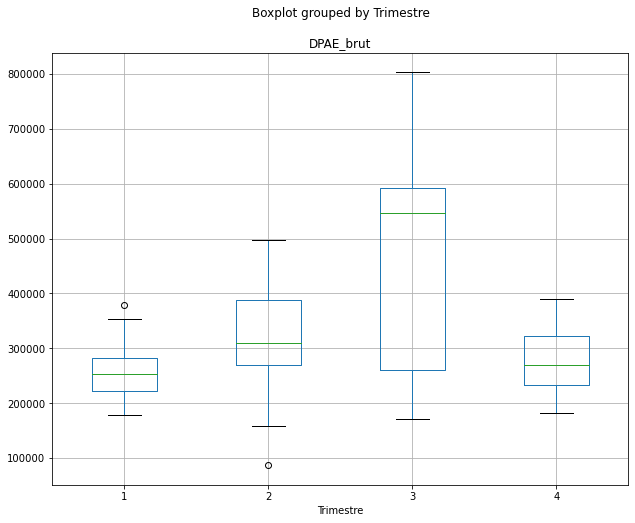

In [7]:
ax= CDD.plot(y=["DPAE_brut"],style='-')
CDD.resample('BA').mean().plot(y=["DPAE_brut"],style=':',ax=ax,figsize=(20,8))

CDD.boxplot(column=["DPAE_brut"], by='Annee', figsize=(20,8))
CDD.boxplot(column=["DPAE_brut"], by='Trimestre', figsize=(10,8))


In [8]:
EES = pd.read_excel('Tableau_Emploi-Salarie-Trimestre-National_09032022.xlsx',index_col=0)

In [9]:
EES.head(5)


,idBank,Dernière mise à jour,Période,1970-T4,1971-T1,1971-T2,1971-T3,1971-T4,1972-T1,1972-T2,...,2019-T3,2019-T4,2020-T1,2020-T2,2020-T3,2020-T4,2021-T1,2021-T2,2021-T3,2021-T4
Libellé,,,,,,,,,,,,,,,,,,,,,
"Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée",1577239,12/05/2017 00:00,NaN,12409.6,12418.8,12485.6,12576.1,12628.8,12689,12735.9,...,(O),(O),(O),(O),(O),(O),(O),(O),(O),(O)
"Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS",1577235,09/03/2022 07:30,NaN,5447.9,5466.3,5494.7,5529.1,5534.1,5543.1,5563.8,...,3166,3165.2,3153.7,3130,3122.5,3110.2,3117.4,3120.8,3126.3,3131.3
Emplois salariés trimestriels - Construction - Section F - CVS,1577236,09/03/2022 07:30,NaN,1760.3,1759.6,1764.1,1767.8,1761.1,1757.3,1757.3,...,1423.5,1431.7,1434,1438.1,1454.2,1462.5,1493.5,1494.5,1493,1499.3
"Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS",1577237,09/03/2022 07:30,NaN,5349.1,5340.5,5375.2,5428.6,5483.5,5539.3,5566,...,12525.8,12581.9,12130.9,12025.3,12302.5,12231.7,12329.9,12606.7,12715.9,12815.1
"Emplois salariés trimestriels - Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS",1577241,09/03/2022 07:30,NaN,293.2,293.5,293.9,294.2,294.3,294.6,294.5,...,376.8,377.3,377.4,376.1,376.9,376.9,378.9,380.1,380.5,381


In [10]:
EES_A = EES.replace("(O)",pd.NA)

In [11]:
EES_A.head()

,idBank,Dernière mise à jour,Période,1970-T4,1971-T1,1971-T2,1971-T3,1971-T4,1972-T1,1972-T2,...,2019-T3,2019-T4,2020-T1,2020-T2,2020-T3,2020-T4,2021-T1,2021-T2,2021-T3,2021-T4
Libellé,,,,,,,,,,,,,,,,,,,,,
"Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée",1577239,12/05/2017 00:00,NaN,12409.6,12418.8,12485.6,12576.1,12628.8,12689,12735.9,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
"Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS",1577235,09/03/2022 07:30,NaN,5447.9,5466.3,5494.7,5529.1,5534.1,5543.1,5563.8,...,3166,3165.2,3153.7,3130,3122.5,3110.2,3117.4,3120.8,3126.3,3131.3
Emplois salariés trimestriels - Construction - Section F - CVS,1577236,09/03/2022 07:30,NaN,1760.3,1759.6,1764.1,1767.8,1761.1,1757.3,1757.3,...,1423.5,1431.7,1434,1438.1,1454.2,1462.5,1493.5,1494.5,1493,1499.3
"Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS",1577237,09/03/2022 07:30,NaN,5349.1,5340.5,5375.2,5428.6,5483.5,5539.3,5566,...,12525.8,12581.9,12130.9,12025.3,12302.5,12231.7,12329.9,12606.7,12715.9,12815.1
"Emplois salariés trimestriels - Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS",1577241,09/03/2022 07:30,NaN,293.2,293.5,293.9,294.2,294.3,294.6,294.5,...,376.8,377.3,377.4,376.1,376.9,376.9,378.9,380.1,380.5,381


In [12]:
EES_A.isna().sum()
EES_NET = EES_A.drop(["idBank","Dernière mise à jour", "Période"],axis=1)

In [13]:
EES_NET.head(5)

,1970-T4,1971-T1,1971-T2,1971-T3,1971-T4,1972-T1,1972-T2,1972-T3,1972-T4,1973-T1,...,2019-T3,2019-T4,2020-T1,2020-T2,2020-T3,2020-T4,2021-T1,2021-T2,2021-T3,2021-T4
Libellé,,,,,,,,,,,,,,,,,,,,,
"Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée",12409.6,12418.8,12485.6,12576.1,12628.8,12689,12735.9,12815.4,12922.1,13009.7,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
"Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS",5447.9,5466.3,5494.7,5529.1,5534.1,5543.1,5563.8,5589.5,5627.5,5669.5,...,3166,3165.2,3153.7,3130,3122.5,3110.2,3117.4,3120.8,3126.3,3131.3
Emplois salariés trimestriels - Construction - Section F - CVS,1760.3,1759.6,1764.1,1767.8,1761.1,1757.3,1757.3,1758.1,1769,1773.5,...,1423.5,1431.7,1434,1438.1,1454.2,1462.5,1493.5,1494.5,1493,1499.3
"Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS",5349.1,5340.5,5375.2,5428.6,5483.5,5539.3,5566,5619.8,5678.9,5720.8,...,12525.8,12581.9,12130.9,12025.3,12302.5,12231.7,12329.9,12606.7,12715.9,12815.1
"Emplois salariés trimestriels - Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS",293.2,293.5,293.9,294.2,294.3,294.6,294.5,295,295.4,295.7,...,376.8,377.3,377.4,376.1,376.9,376.9,378.9,380.1,380.5,381


In [14]:
EES_NET=EES_NET.dropna(axis=0)

In [15]:
EES_NET.head(5)

,1970-T4,1971-T1,1971-T2,1971-T3,1971-T4,1972-T1,1972-T2,1972-T3,1972-T4,1973-T1,...,2019-T3,2019-T4,2020-T1,2020-T2,2020-T3,2020-T4,2021-T1,2021-T2,2021-T3,2021-T4
Libellé,,,,,,,,,,,,,,,,,,,,,
"Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS",5447.9,5466.3,5494.7,5529.1,5534.1,5543.1,5563.8,5589.5,5627.5,5669.5,...,3166,3165.2,3153.7,3130,3122.5,3110.2,3117.4,3120.8,3126.3,3131.3
Emplois salariés trimestriels - Construction - Section F - CVS,1760.3,1759.6,1764.1,1767.8,1761.1,1757.3,1757.3,1758.1,1769,1773.5,...,1423.5,1431.7,1434,1438.1,1454.2,1462.5,1493.5,1494.5,1493,1499.3
"Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS",5349.1,5340.5,5375.2,5428.6,5483.5,5539.3,5566,5619.8,5678.9,5720.8,...,12525.8,12581.9,12130.9,12025.3,12302.5,12231.7,12329.9,12606.7,12715.9,12815.1
"Emplois salariés trimestriels - Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS",293.2,293.5,293.9,294.2,294.3,294.6,294.5,295,295.4,295.7,...,376.8,377.3,377.4,376.1,376.9,376.9,378.9,380.1,380.5,381
"Emplois salariés trimestriels - Fabrication de denrées alimentaires, de boissons et de produits à base de tabac - A17 : C1 - CVS",507.1,508.2,514.3,523,514.5,510.8,510.7,519.7,520.1,523.1,...,587.6,590.4,589.3,582.9,589,589.2,597.7,603.1,608.6,612.1


In [16]:
EES_NET.loc['total'] = EES_NET.sum(numeric_only=False, axis=0)

In [17]:
EES_NET.tail(3)

,1970-T4,1971-T1,1971-T2,1971-T3,1971-T4,1972-T1,1972-T2,1972-T3,1972-T4,1973-T1,...,2019-T3,2019-T4,2020-T1,2020-T2,2020-T3,2020-T4,2021-T1,2021-T2,2021-T3,2021-T4
Libellé,,,,,,,,,,,,,,,,,,,,,
Emplois salariés trimestriels - Activités financières et d'assurance - A38 : KZ - CVS,383.3,387.4,394.3,401.6,410.4,420.2,428.4,437.9,446.1,453.9,...,882.5,881.4,877.6,872.6,869.7,867.1,870.3,873.3,875.7,877.8
Emplois salariés trimestriels - Activités immobilières - A38 : LZ - CVS,114.6,114.5,115.8,117.5,119.5,121.4,123.1,125,126.9,129,...,250.1,250.2,248.3,246.2,245.3,244.7,247.2,245.5,243,241.2
total,31714.6,31738.9,31915.9,32148.4,32277.1,32436.3,32551.3,32766.2,33044.7,33270.7,...,43455.6,43639.3,42634.2,42244.5,42902.1,42714.6,43039.4,43779.3,44044.2,44320.6


In [63]:
EES_TOTAL = EES_NET.loc['total']
EES_TOTAL.index

Index(['1970-T4', '1971-T1', '1971-T2', '1971-T3', '1971-T4', '1972-T1',
       '1972-T2', '1972-T3', '1972-T4', '1973-T1',
       ...
       '2019-T3', '2019-T4', '2020-T1', '2020-T2', '2020-T3', '2020-T4',
       '2021-T1', '2021-T2', '2021-T3', '2021-T4'],
      dtype='object', length=205)

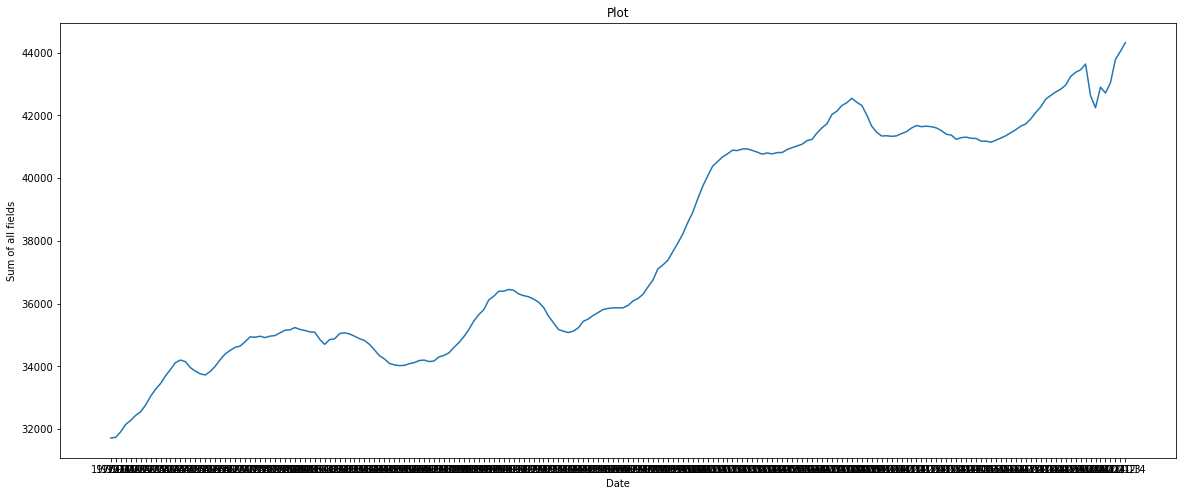

In [69]:
plt.figure(figsize=(20, 8))
plt.plot(EES_TOTAL)
plt.xlabel("Date")
plt.ylabel("Sum of all fields")
plt.title("Plot")

plt.show()

In [39]:
EES_NET.index

Index(['Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS',
       'Emplois salariés trimestriels - Construction - Section F - CVS',
       'Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS',
       'Emplois salariés trimestriels - Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS',
       'Emplois salariés trimestriels - Fabrication de denrées alimentaires, de boissons et de produits à base de tabac - A17 : C1 - CVS',
       'Emplois salariés trimestriels - Cokéfaction et raffinage - A17 : C2 - CVS',
       'Emplois salariés trimestriels - Fabrication d'équipements électriques, électroniques, informatiques, fabrication de machines - A17 : C3 - CVS',
       'Emplois salariés trimestriels - Fabrication de matériels de transport - A17 : C4 - CVS',
       'Emplois salariés trimestriels - Fabrication d'autres produits industriels - A17 : C5 - CVS',
       'Emplois salariés trime

In [40]:
EES_NET[:4]

,1970-T4,1971-T1,1971-T2,1971-T3,1971-T4,1972-T1,1972-T2,1972-T3,1972-T4,1973-T1,...,2019-T3,2019-T4,2020-T1,2020-T2,2020-T3,2020-T4,2021-T1,2021-T2,2021-T3,2021-T4
Libellé,,,,,,,,,,,,,,,,,,,,,
"Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS",5447.9,5466.3,5494.7,5529.1,5534.1,5543.1,5563.8,5589.5,5627.5,5669.5,...,3166,3165.2,3153.7,3130,3122.5,3110.2,3117.4,3120.8,3126.3,3131.3
Emplois salariés trimestriels - Construction - Section F - CVS,1760.3,1759.6,1764.1,1767.8,1761.1,1757.3,1757.3,1758.1,1769,1773.5,...,1423.5,1431.7,1434,1438.1,1454.2,1462.5,1493.5,1494.5,1493,1499.3
"Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS",5349.1,5340.5,5375.2,5428.6,5483.5,5539.3,5566,5619.8,5678.9,5720.8,...,12525.8,12581.9,12130.9,12025.3,12302.5,12231.7,12329.9,12606.7,12715.9,12815.1
"Emplois salariés trimestriels - Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS",293.2,293.5,293.9,294.2,294.3,294.6,294.5,295,295.4,295.7,...,376.8,377.3,377.4,376.1,376.9,376.9,378.9,380.1,380.5,381


In [75]:
secteur1 = EES_NET.iloc[[1]]
secteur2 = EES_NET.iloc[[2]]
secteur3 = EES_NET.iloc[[3]]
secteur4 = EES_NET.iloc[[4]]


In [90]:
secteur1
secteur1.describe()


,2010-T4,2011-T1,2011-T2,2011-T3,2011-T4,2012-T1,2012-T2,2012-T3,2012-T4,2013-T1,...,2014-T4,2015-T1,2015-T2,2015-T3,2015-T4,2016-T1,2016-T2,2016-T3,2016-T4,2017-T1
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,1476.5,1476.5,1473.4,1469.1,1468.2,1469.9,1463.4,1458.3,1451.5,1440.2,...,1376.3,1364.1,1353.2,1343.0,1341.0,1337.3,1335.8,1334.7,1332.3,1336.9
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1476.5,1476.5,1473.4,1469.1,1468.2,1469.9,1463.4,1458.3,1451.5,1440.2,...,1376.3,1364.1,1353.2,1343.0,1341.0,1337.3,1335.8,1334.7,1332.3,1336.9
25%,1476.5,1476.5,1473.4,1469.1,1468.2,1469.9,1463.4,1458.3,1451.5,1440.2,...,1376.3,1364.1,1353.2,1343.0,1341.0,1337.3,1335.8,1334.7,1332.3,1336.9
50%,1476.5,1476.5,1473.4,1469.1,1468.2,1469.9,1463.4,1458.3,1451.5,1440.2,...,1376.3,1364.1,1353.2,1343.0,1341.0,1337.3,1335.8,1334.7,1332.3,1336.9
75%,1476.5,1476.5,1473.4,1469.1,1468.2,1469.9,1463.4,1458.3,1451.5,1440.2,...,1376.3,1364.1,1353.2,1343.0,1341.0,1337.3,1335.8,1334.7,1332.3,1336.9
max,1476.5,1476.5,1473.4,1469.1,1468.2,1469.9,1463.4,1458.3,1451.5,1440.2,...,1376.3,1364.1,1353.2,1343.0,1341.0,1337.3,1335.8,1334.7,1332.3,1336.9


In [43]:
secteur2
secteur2.describe()


,1970-T4,1971-T1,1971-T2,1971-T3,1971-T4,1972-T1,1972-T2,1972-T3,1972-T4,1973-T1,...,2019-T3,2019-T4,2020-T1,2020-T2,2020-T3,2020-T4,2021-T1,2021-T2,2021-T3,2021-T4
Libellé,,,,,,,,,,,,,,,,,,,,,
"Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS",5349.1,5340.5,5375.2,5428.6,5483.5,5539.3,5566,5619.8,5678.9,5720.8,...,12525.8,12581.9,12130.9,12025.3,12302.5,12231.7,12329.9,12606.7,12715.9,12815.1


In [91]:
secteur3
secteur3.describe()


,2010-T4,2011-T1,2011-T2,2011-T3,2011-T4,2012-T1,2012-T2,2012-T3,2012-T4,2013-T1,...,2014-T4,2015-T1,2015-T2,2015-T3,2015-T4,2016-T1,2016-T2,2016-T3,2016-T4,2017-T1
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,369.7,369.9,369.7,369.2,370.5,372.0,373.9,375.1,376.0,376.6,...,378.2,377.3,377.2,377.4,377.3,377.1,376.7,376.3,374.5,371.8
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,369.7,369.9,369.7,369.2,370.5,372.0,373.9,375.1,376.0,376.6,...,378.2,377.3,377.2,377.4,377.3,377.1,376.7,376.3,374.5,371.8
25%,369.7,369.9,369.7,369.2,370.5,372.0,373.9,375.1,376.0,376.6,...,378.2,377.3,377.2,377.4,377.3,377.1,376.7,376.3,374.5,371.8
50%,369.7,369.9,369.7,369.2,370.5,372.0,373.9,375.1,376.0,376.6,...,378.2,377.3,377.2,377.4,377.3,377.1,376.7,376.3,374.5,371.8
75%,369.7,369.9,369.7,369.2,370.5,372.0,373.9,375.1,376.0,376.6,...,378.2,377.3,377.2,377.4,377.3,377.1,376.7,376.3,374.5,371.8
max,369.7,369.9,369.7,369.2,370.5,372.0,373.9,375.1,376.0,376.6,...,378.2,377.3,377.2,377.4,377.3,377.1,376.7,376.3,374.5,371.8


In [93]:
secteur4
secteur4.describe()

,2010-T4,2011-T1,2011-T2,2011-T3,2011-T4,2012-T1,2012-T2,2012-T3,2012-T4,2013-T1,...,2014-T4,2015-T1,2015-T2,2015-T3,2015-T4,2016-T1,2016-T2,2016-T3,2016-T4,2017-T1
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,563.9,563.6,563.9,563.6,563.5,563.8,563.7,563.6,561.7,561.6,...,562.5,562.9,563.5,565.0,567.4,570.0,571.2,571.8,572.7,574.1
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,563.9,563.6,563.9,563.6,563.5,563.8,563.7,563.6,561.7,561.6,...,562.5,562.9,563.5,565.0,567.4,570.0,571.2,571.8,572.7,574.1
25%,563.9,563.6,563.9,563.6,563.5,563.8,563.7,563.6,561.7,561.6,...,562.5,562.9,563.5,565.0,567.4,570.0,571.2,571.8,572.7,574.1
50%,563.9,563.6,563.9,563.6,563.5,563.8,563.7,563.6,561.7,561.6,...,562.5,562.9,563.5,565.0,567.4,570.0,571.2,571.8,572.7,574.1
75%,563.9,563.6,563.9,563.6,563.5,563.8,563.7,563.6,561.7,561.6,...,562.5,562.9,563.5,565.0,567.4,570.0,571.2,571.8,572.7,574.1
max,563.9,563.6,563.9,563.6,563.5,563.8,563.7,563.6,561.7,561.6,...,562.5,562.9,563.5,565.0,567.4,570.0,571.2,571.8,572.7,574.1


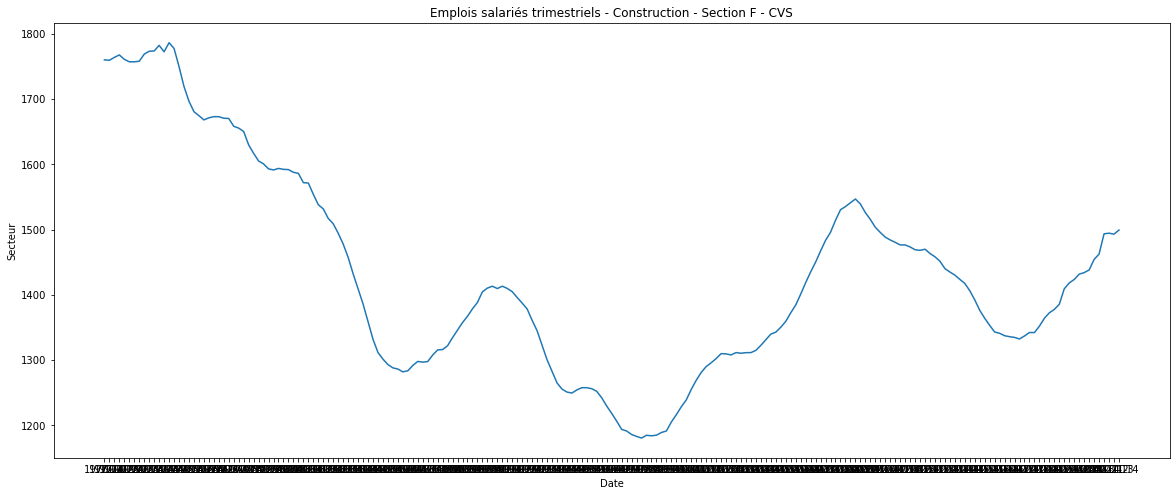

In [86]:
plt.figure(figsize=(20, 8))
plt.plot(secteur1.columns, secteur1.iloc[0])

plt.xlabel("Date")
plt.ylabel("Secteur")
plt.title("Emplois salariés trimestriels - Construction - Section F - CVS")

plt.show()

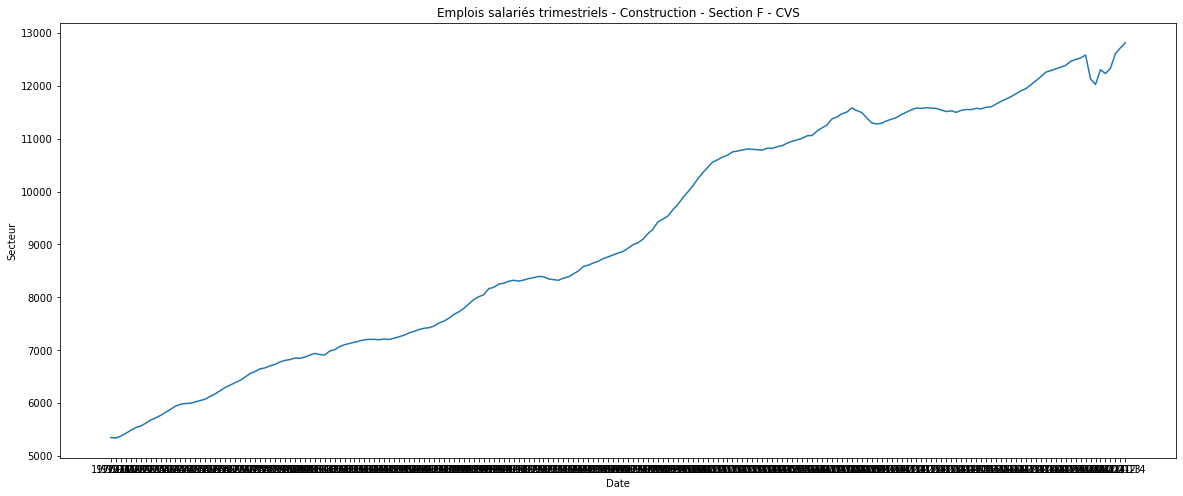

In [87]:
plt.figure(figsize=(20, 8))

plt.plot(secteur2.columns, secteur2.iloc[0])


plt.xlabel("Date")
plt.ylabel("Secteur")
plt.title("Emplois salariés trimestriels - Construction - Section F - CVS")

plt.show()

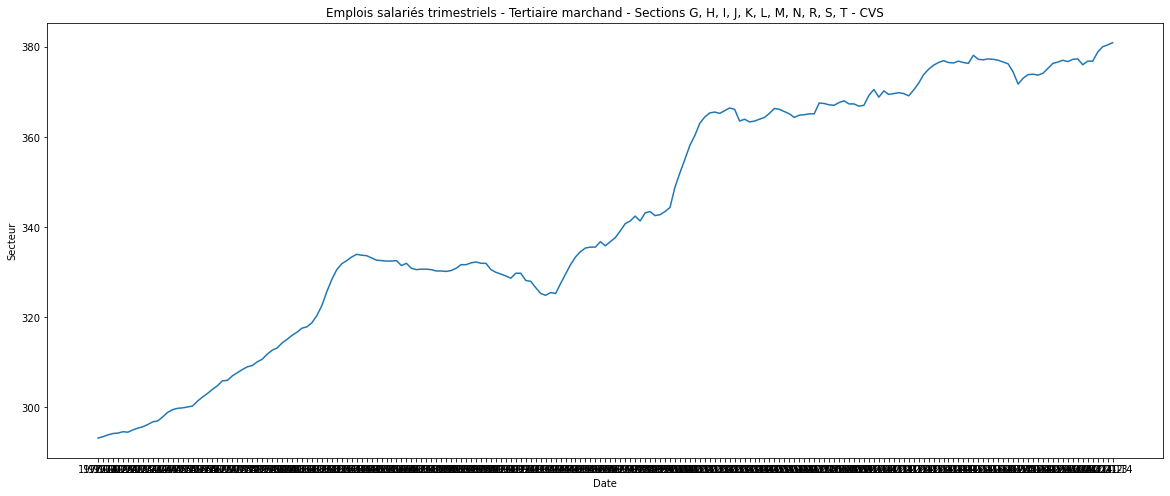

In [88]:
plt.figure(figsize=(20, 8))

plt.plot(secteur3.columns, secteur3.iloc[0])


plt.xlabel("Date")
plt.ylabel("Secteur")
plt.title("Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS")

plt.show()

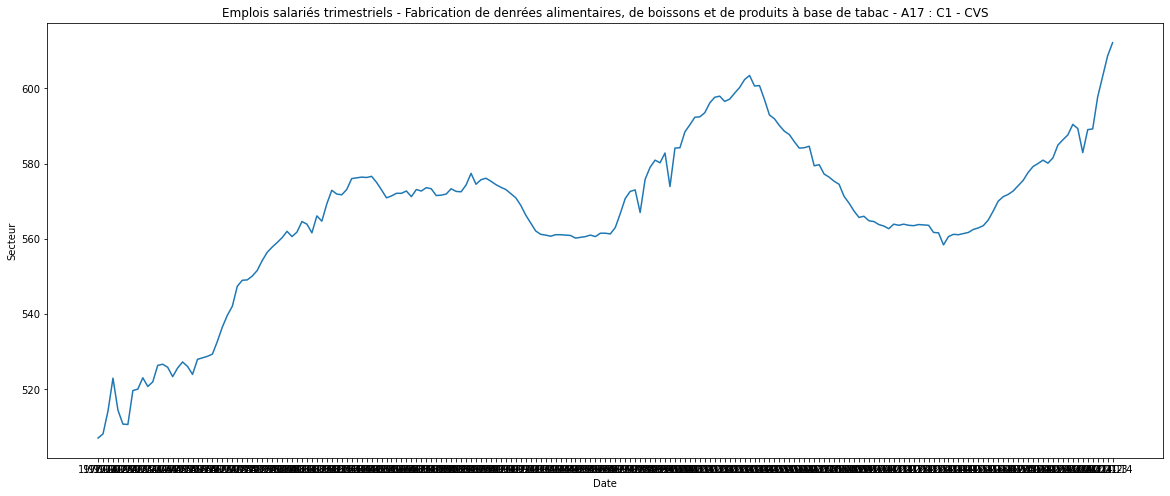

In [89]:
plt.figure(figsize=(20, 8))

plt.plot(secteur4.columns, secteur4.iloc[0])

plt.xlabel("Date")
plt.ylabel("Secteur")
plt.title("Emplois salariés trimestriels - Fabrication de denrées alimentaires, de boissons et de produits à base de tabac - A17 : C1 - CVS")

plt.show()

Question 2 :

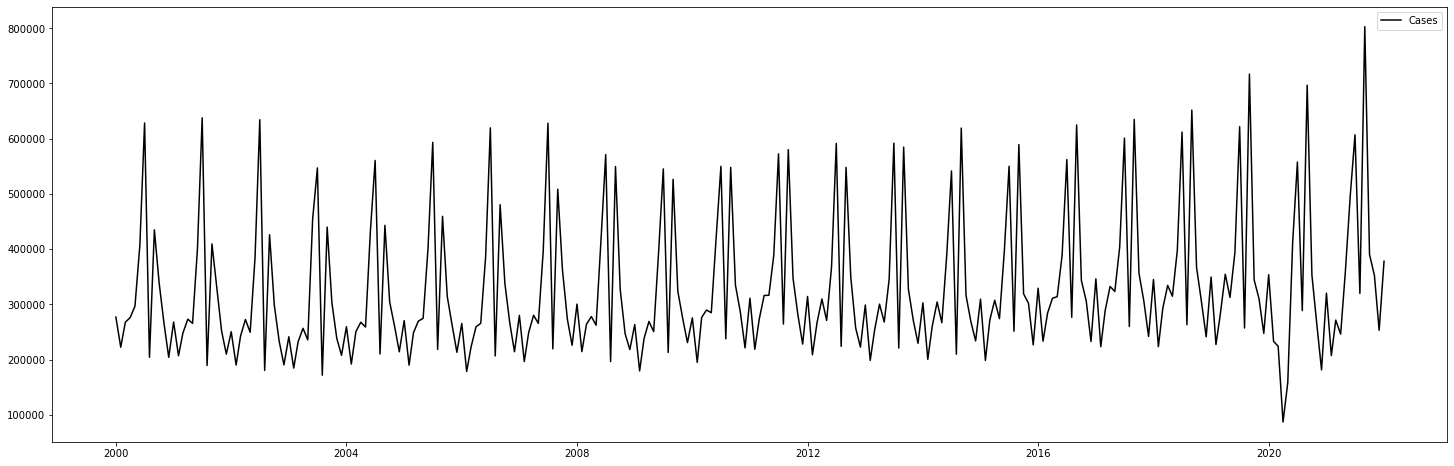

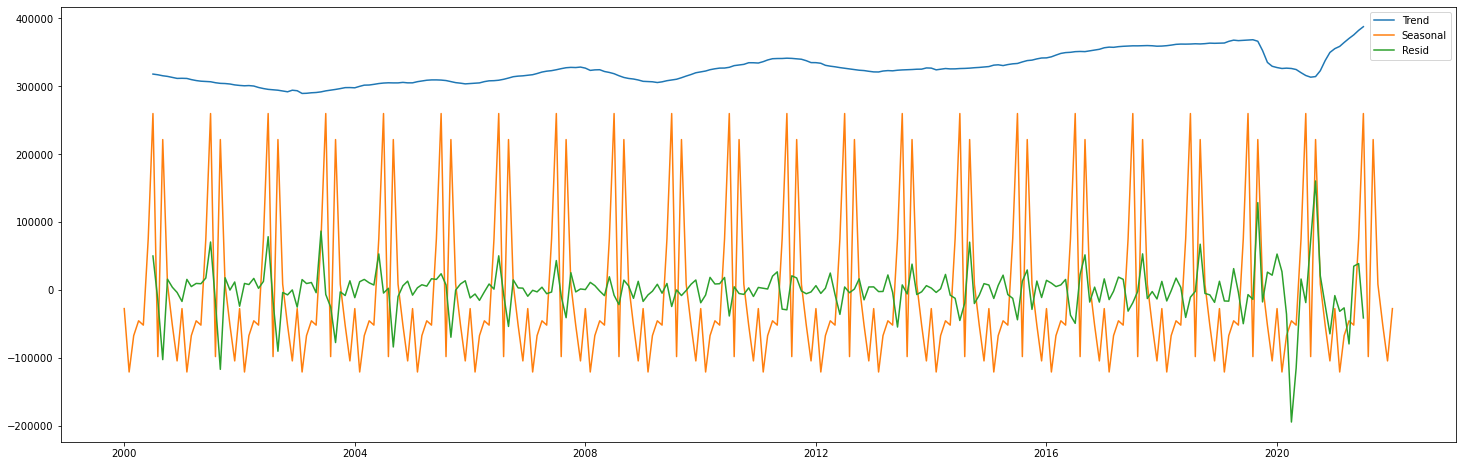

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(CDD["DPAE_brut"], period=12) 


plt.figure(figsize=(25,8))
plt.plot(CDD.index, CDD["DPAE_brut"], 'k')
plt.legend(['Cases'])
plt.figure(figsize=(25,8))
plt.plot(CDD.index,decomposition.trend)
plt.plot(CDD.index,decomposition.seasonal)
plt.plot(CDD.index,decomposition.resid)
plt.legend(['Trend', 'Seasonal', 'Resid'])

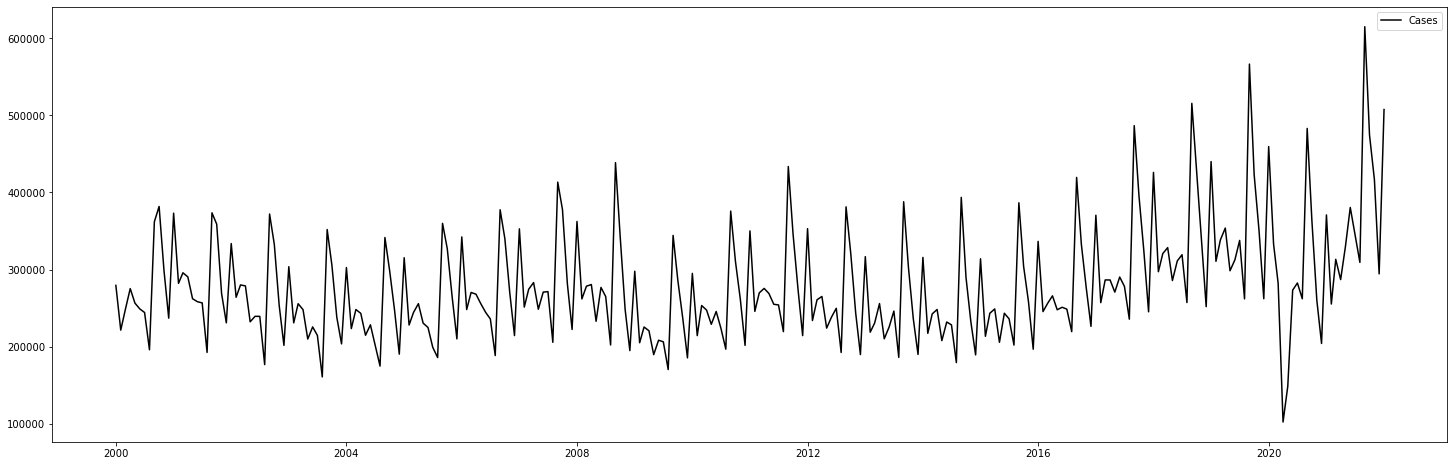

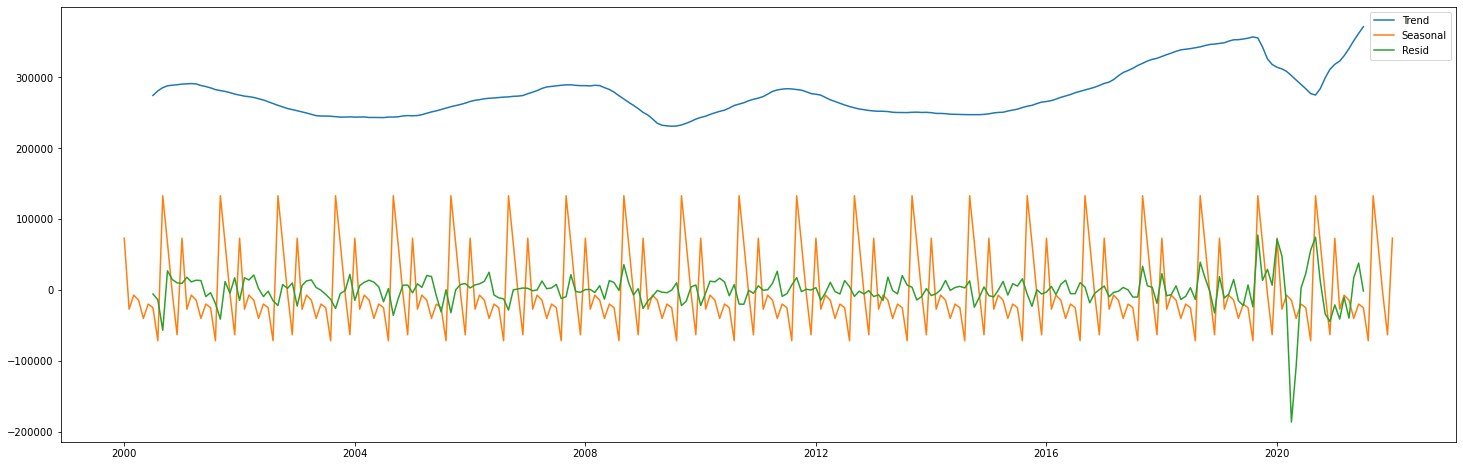

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(CDI["DPAE_brut"], period=12) 


plt.figure(figsize=(25,8))
plt.plot(CDI.index, CDI["DPAE_brut"], 'k')
plt.legend(['Cases'])
plt.figure(figsize=(25,8))
plt.plot(CDI.index,decomposition.trend)
plt.plot(CDI.index,decomposition.seasonal)
plt.plot(CDI.index,decomposition.resid)
plt.legend(['Trend', 'Seasonal', 'Resid'])